In [11]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [12]:
file_name='fruit_data_with_colors.txt'
fruits = pd.read_table(file_name)

In [13]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [14]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [15]:
X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\Муся\AppData\Local\Temp\ipykernel_2100\793076301.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gnuplot')


<IPython.core.display.Javascript object>


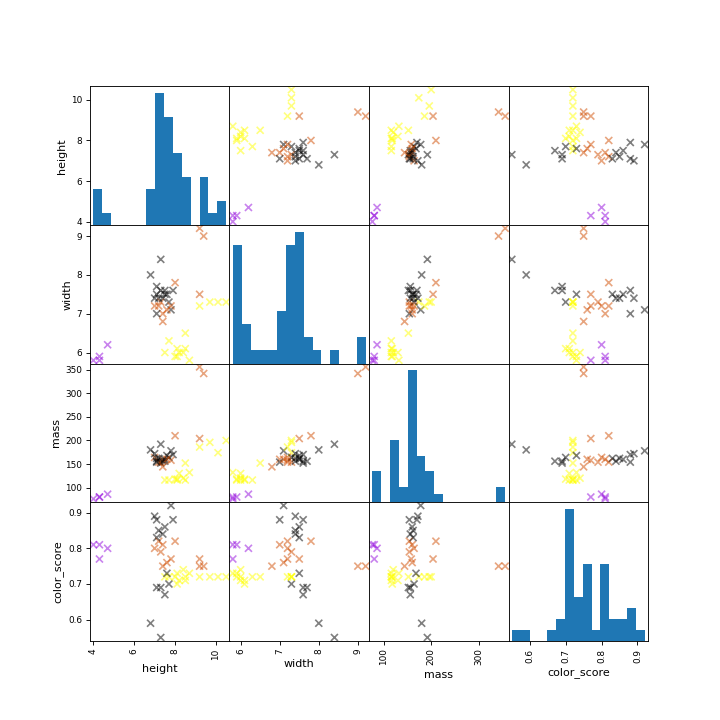

E:\wunu\inf_obch\anac3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:97: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


In [18]:
from matplotlib import cm
from pandas.plotting import scatter_matrix
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X_train, c= y_train, marker = 'x', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

In [19]:
#Train-Test Split

In [59]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.score(X_test,y_test)

0.6

In [26]:
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

E:\wunu\inf_obch\anac3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'

In [28]:
fruit_prediction = knn.predict([[70, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

E:\wunu\inf_obch\anac3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'

<IPython.core.display.Javascript object>


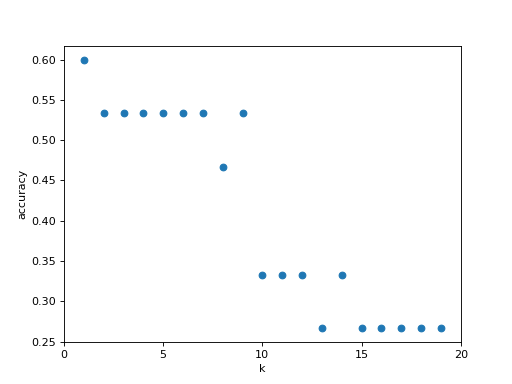

In [33]:
k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

In [34]:
#Regression

In [35]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
file_name='fruit_data_with_colors.txt'
df = pd.read_table(file_name)
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [37]:
Y = df['fruit_name']
X = df[['mass','width','height','color_score']]
import scipy.stats as stats
X = stats.zscore(X)
     

In [39]:
#Split Training and Testing Using sklearn

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) 


In [40]:
#Built Model with sklearn

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100000)
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)
print("Coefficients",model.coef_, '\n')
print("Intercepts", model.intercept_)

Coefficients [[-0.22100316  1.50083901 -0.59912807  0.46967205]
 [ 0.01756495 -1.20915729  1.91809773 -0.68459248]
 [-0.71451045 -0.61416645 -1.35273866  0.18072577]
 [ 0.91794865  0.32248473  0.033769    0.03419466]] 

Intercepts [ 0.95541724 -0.0768071  -2.2273781   1.34876797]


In [41]:
#Summary of Best Model

from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_pred, output_dict = True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
apple,0.500000,0.500000,0.500000,4.000000
lemon,1.000000,1.000000,1.000000,5.000000
orange,0.333333,0.333333,0.333333,3.000000
accuracy,0.666667,0.666667,0.666667,0.666667
macro avg,0.611111,0.611111,0.611111,12.000000
weighted avg,0.666667,0.666667,0.666667,12.000000


E:\wunu\inf_obch\anac3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


<IPython.core.display.Javascript object>


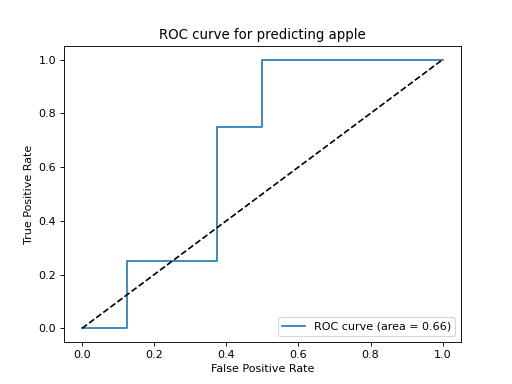

<IPython.core.display.Javascript object>


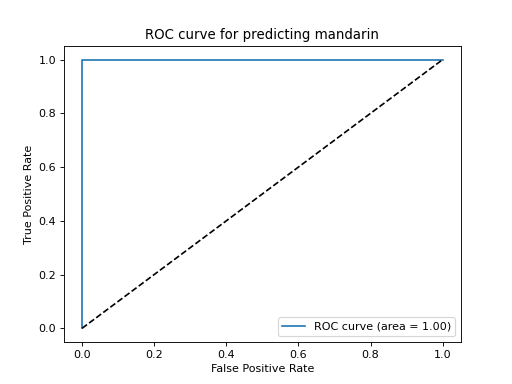

<IPython.core.display.Javascript object>


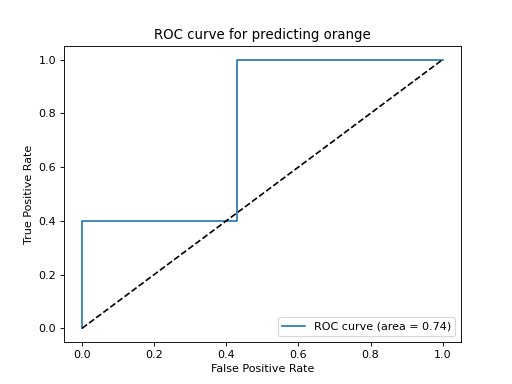

<IPython.core.display.Javascript object>


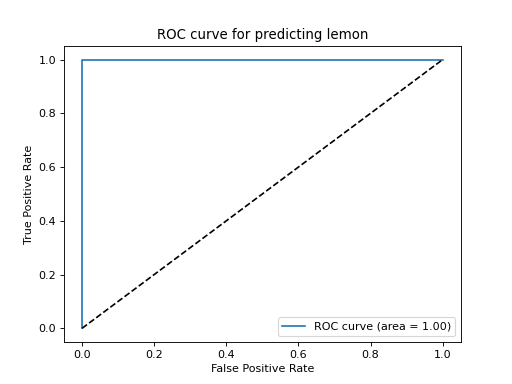

In [45]:
#ROC curve(s) and AUC value(s).

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

classes = Y.unique()
y = label_binarize(Y,classes=classes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clfLogistic = OneVsRestClassifier(LogisticRegressionCV(random_state=0))
y_score = clfLogistic.fit(X_train, y_train).decision_function(X_test)

fpr = {}
tpr = {}
roc_auc = {}
# interate through each class
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i, classname in enumerate(classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for predicting {}'.format(classname))
    plt.legend(loc="lower right")
    plt.show()

In [48]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.7)
clfDecision = DecisionTreeClassifier().fit(X_train, Y_train)

<IPython.core.display.Javascript object>


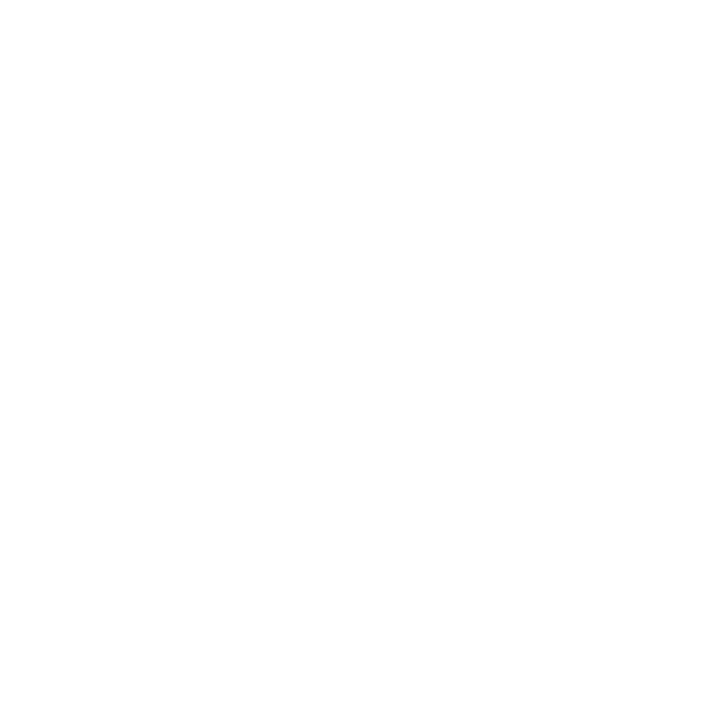

<IPython.core.display.Javascript object>


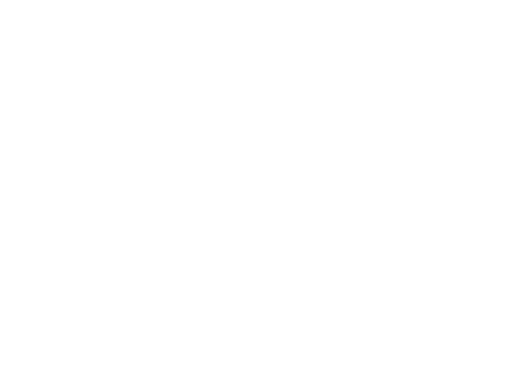

<IPython.core.display.Javascript object>


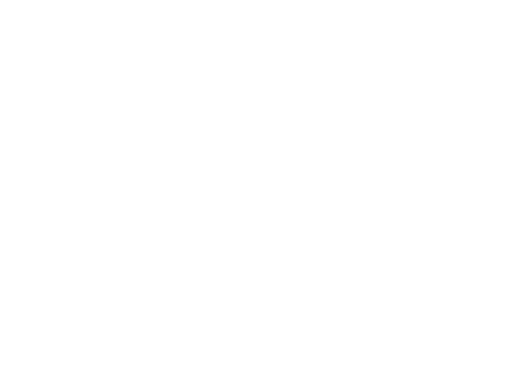

<IPython.core.display.Javascript object>


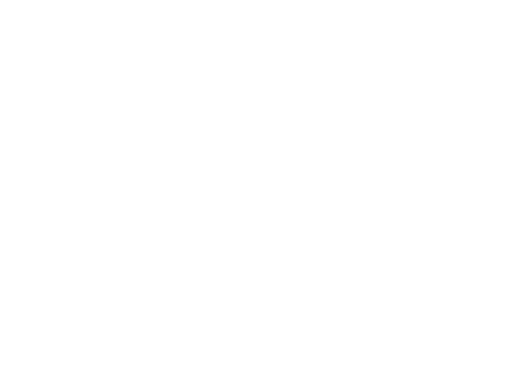

<IPython.core.display.Javascript object>


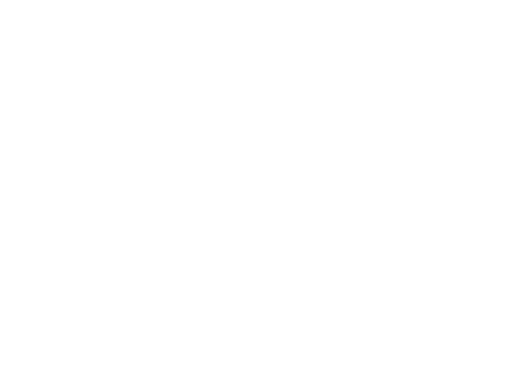

<IPython.core.display.Javascript object>


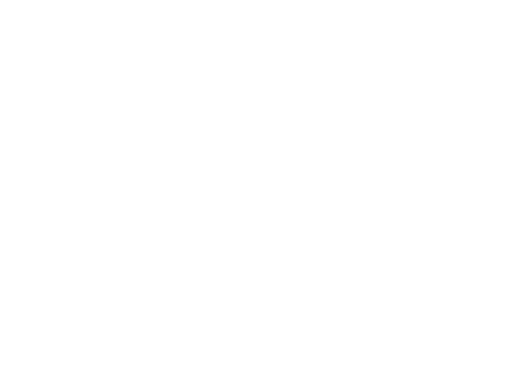

<IPython.core.display.Javascript object>


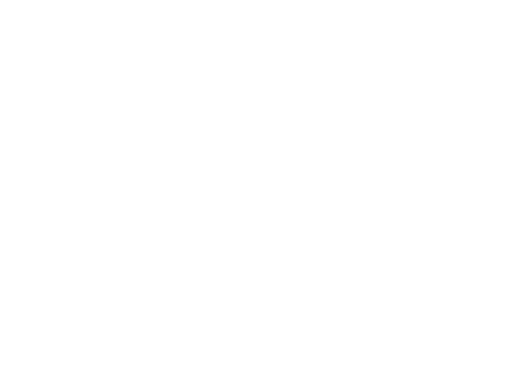

<IPython.core.display.Javascript object>


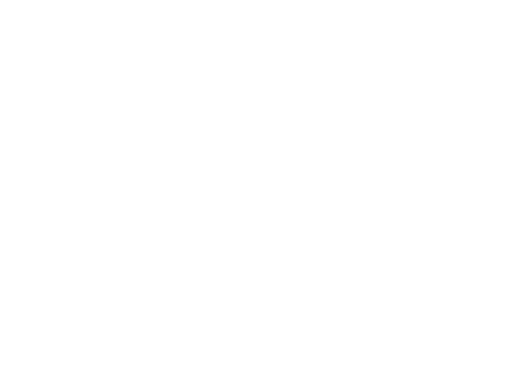

<IPython.core.display.Javascript object>


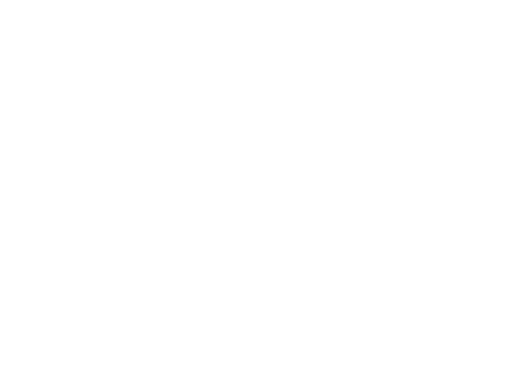

<IPython.core.display.Javascript object>


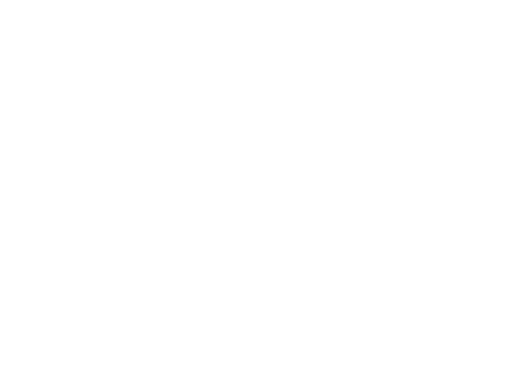

<IPython.core.display.Javascript object>


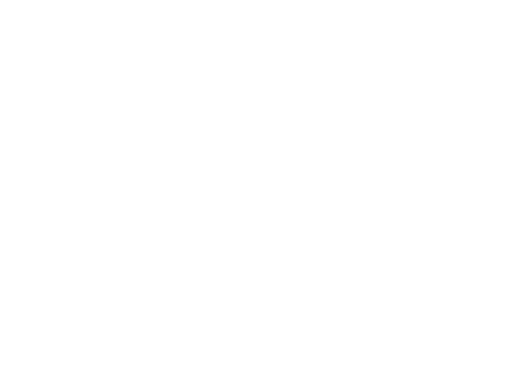

<IPython.core.display.Javascript object>


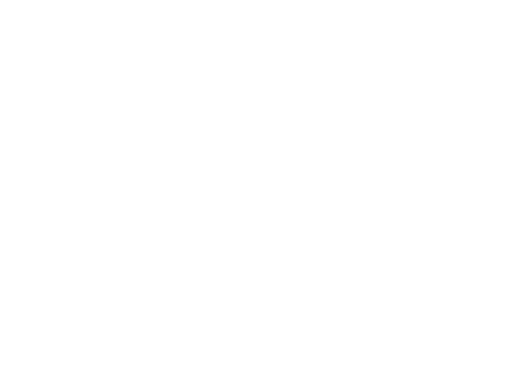

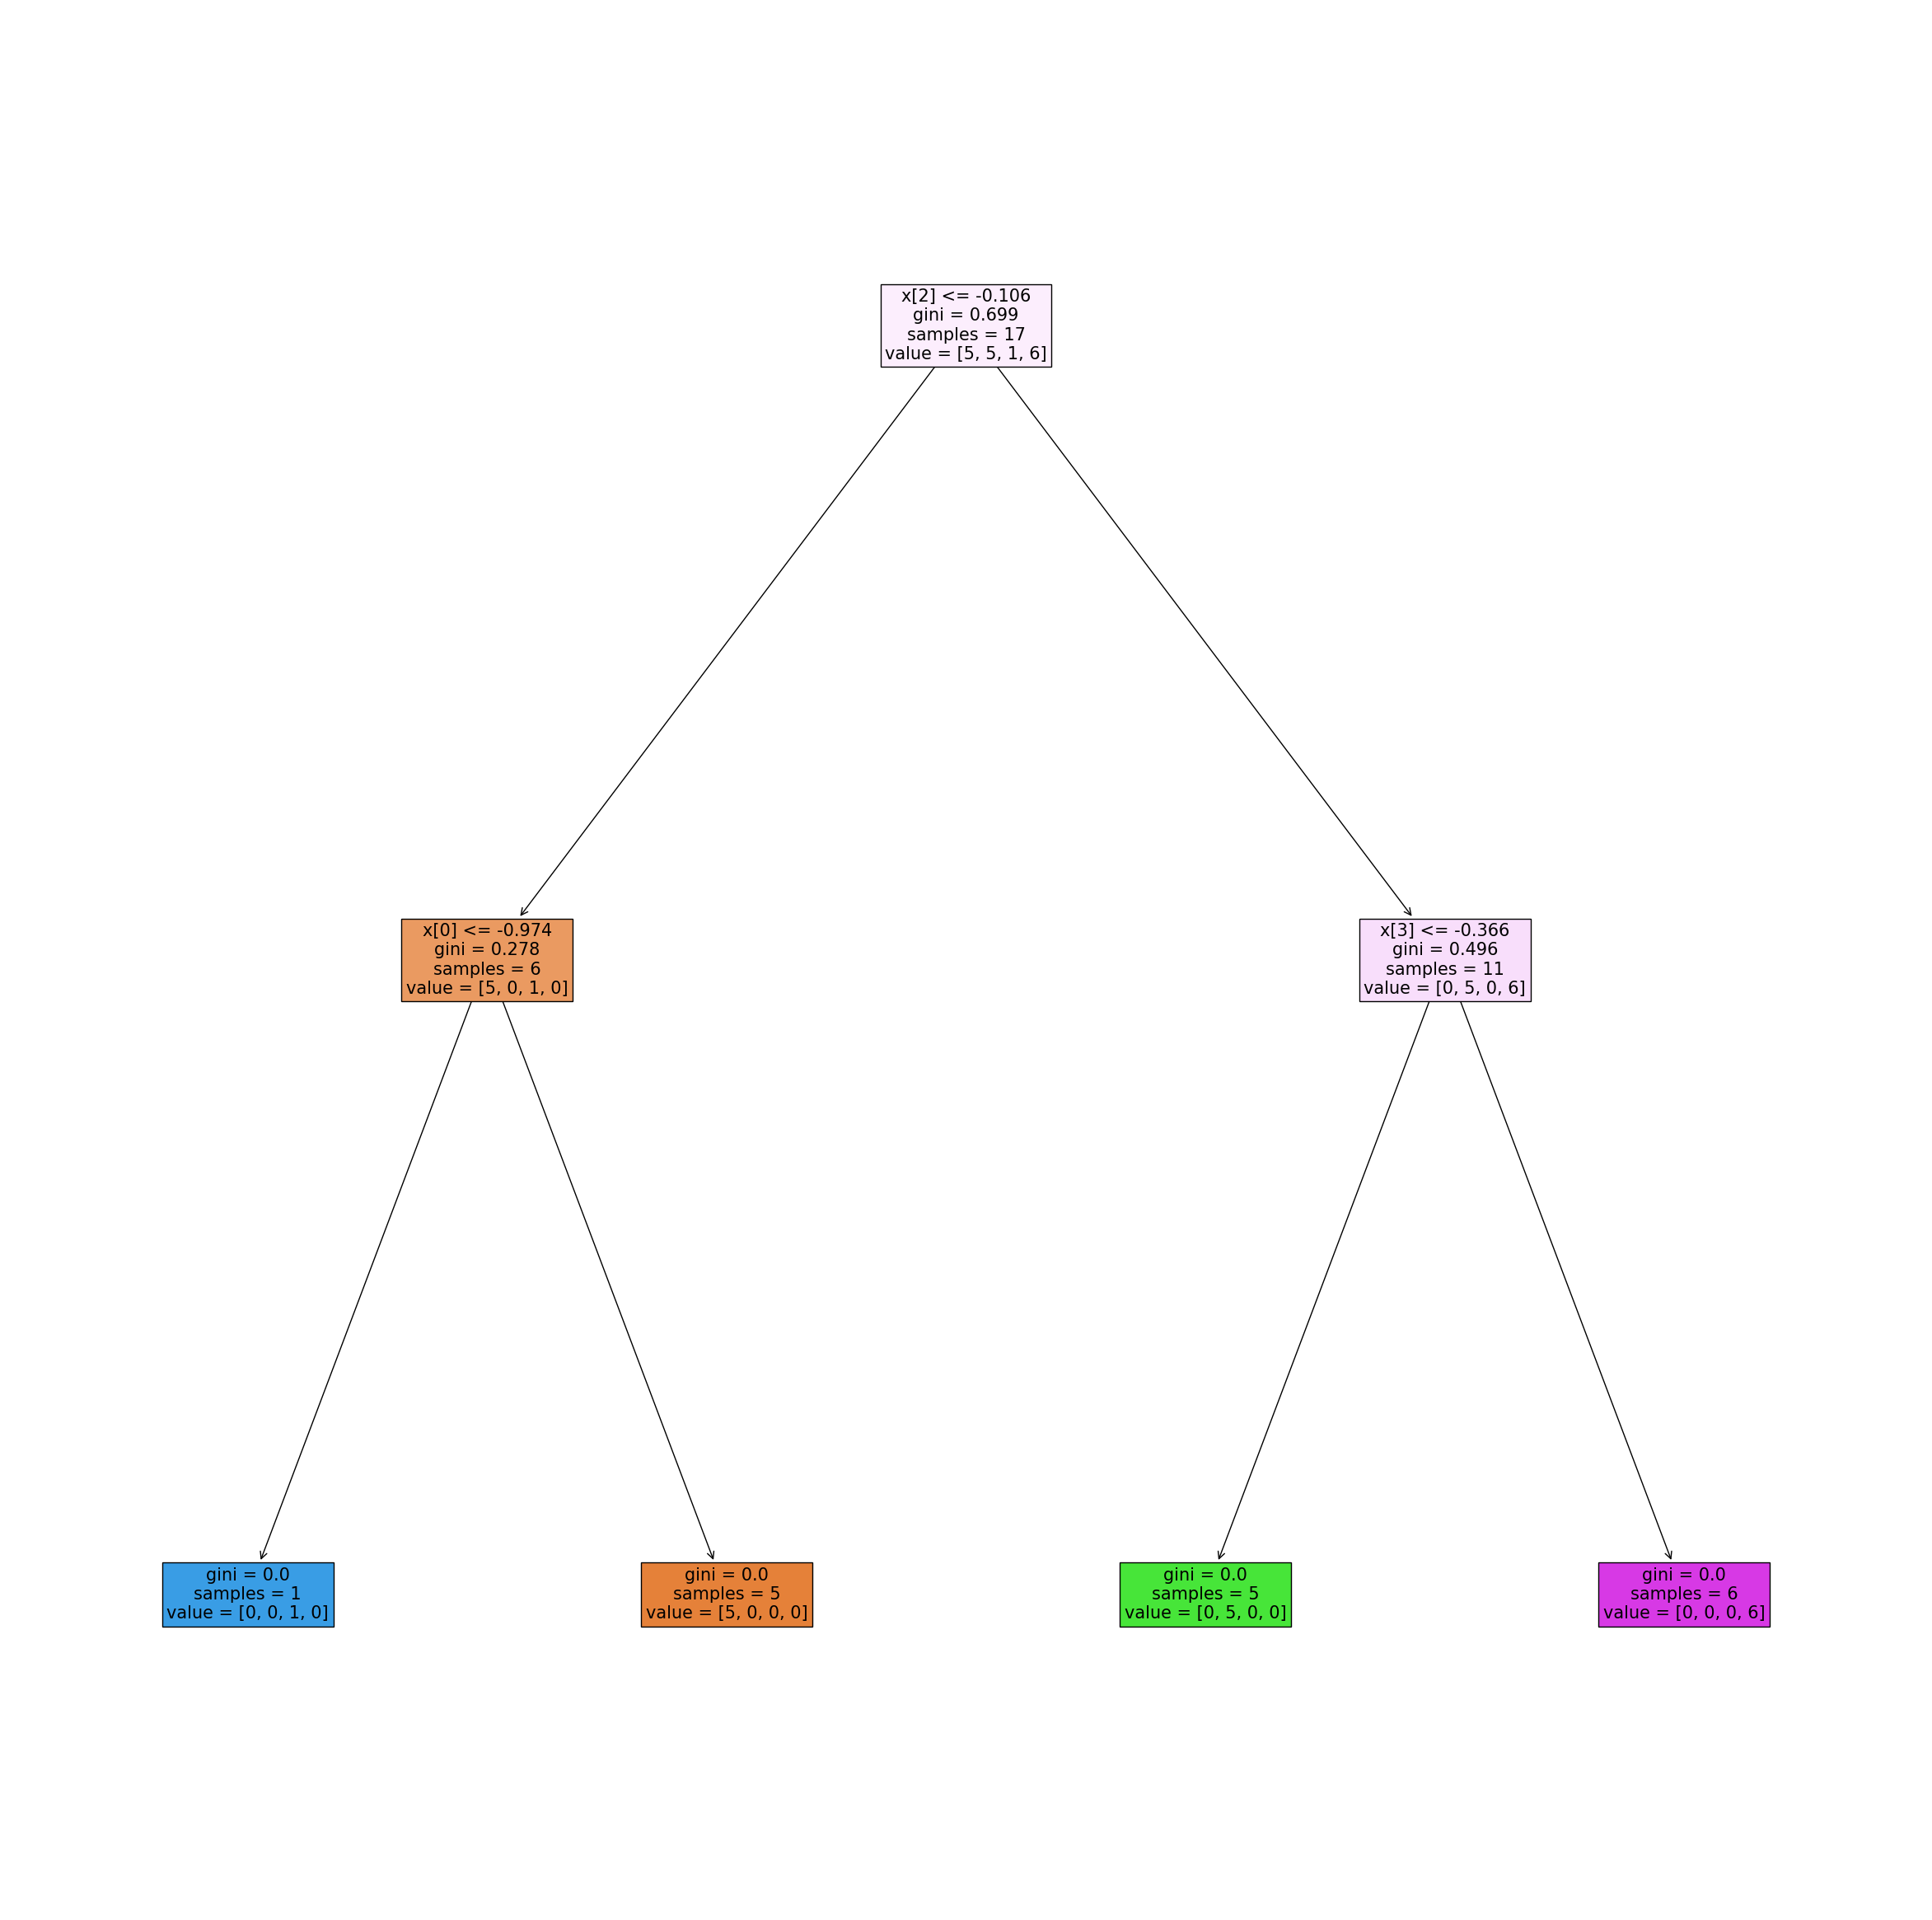

In [49]:
%matplotlib inline
from sklearn.tree import plot_tree
plt.subplots(figsize=(30, 30))
plot_tree(clfDecision,filled=True, fontsize=15)
plt.show()

In [50]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}' .format(clfDecision.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on testing set: {:.2f}'.format(clfDecision.score(X_test, Y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on testing set: 0.64


<IPython.core.display.Javascript object>


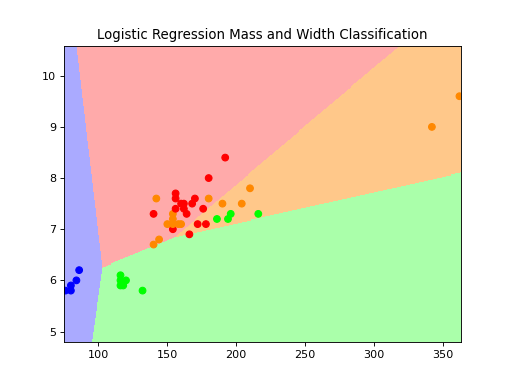

<IPython.core.display.Javascript object>


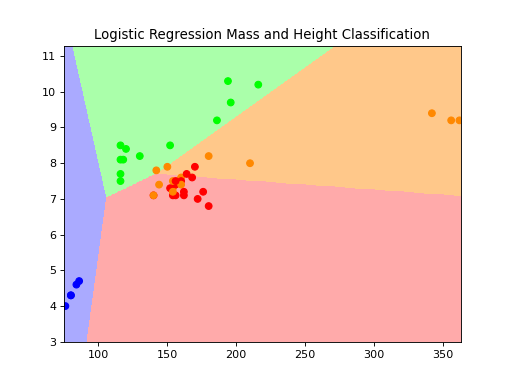

<IPython.core.display.Javascript object>


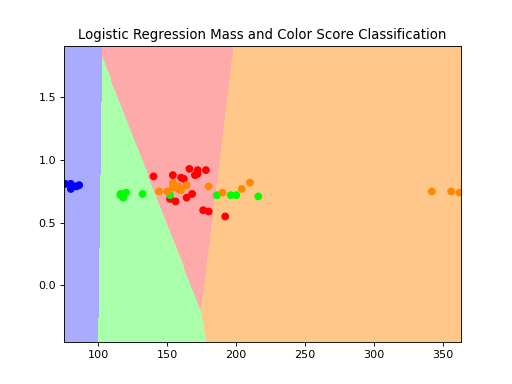

<IPython.core.display.Javascript object>


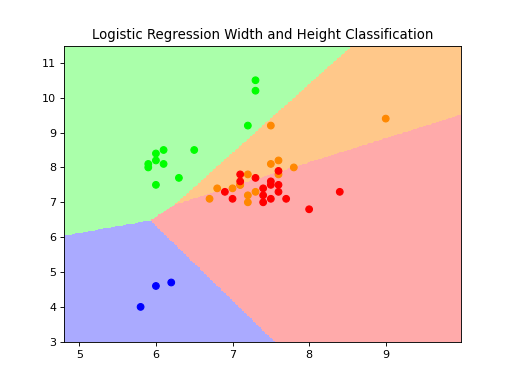

<IPython.core.display.Javascript object>


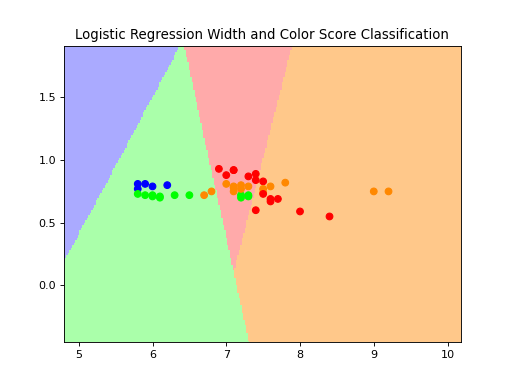

<IPython.core.display.Javascript object>


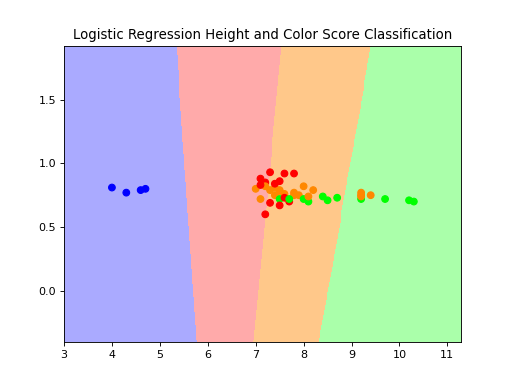

In [46]:
#Logistic Regression Decision Boundaries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegressionCV


Y = df['fruit_name']
y = Y.astype('category').cat.codes

X1 = df[['mass','width']].values
X2 = df[['mass','height']].values
X3 = df[['mass','color_score']].values
X4 = df[['width','height']].values
X5 = df[['width','color_score']].values
X6 = df[['height','color_score']].values

h = .02

def drawDecisionBoundariesLogistic(X,y,name1,name2): 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  model = LogisticRegression(max_iter = 100000)
  model.fit(X_train, y_train)

  # Create color maps
  cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#FFC88A'])
  cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FF8800'])

  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
  y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  Z = model.predict((np.c_[xx.ravel(), yy.ravel()]))

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)

  # plotting
  plt.figure()
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

  # Plot also the training points
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title("Logistic Regression {} and {} Classification".format(name1, name2))
  plt.show()

drawDecisionBoundariesLogistic(X1,y,'Mass','Width')
drawDecisionBoundariesLogistic(X2,y,'Mass','Height')
drawDecisionBoundariesLogistic(X3,y,'Mass','Color Score')
drawDecisionBoundariesLogistic(X4,y,'Width','Height')
drawDecisionBoundariesLogistic(X5,y,'Width','Color Score')
drawDecisionBoundariesLogistic(X6,y,'Height','Color Score')